In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('./data/20191227_seoul_crime_sum_10man.xlsx')
df['년도'].fillna(method='ffill', inplace=True)
df['년도'] = df['년도'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 14 columns):
년도              125 non-null int32
지역              125 non-null object
CCTV            125 non-null int64
등록외국인           125 non-null int64
한국인             125 non-null int64
합계              125 non-null int64
강간강제추행          125 non-null int64
강도              125 non-null int64
범죄합             125 non-null int64
살인              125 non-null int64
절도              125 non-null int64
폭력              125 non-null int64
10만명당 범죄 수      125 non-null int64
10만명당 CCTV 수    125 non-null int64
dtypes: int32(1), int64(12), object(1)
memory usage: 13.3+ KB


In [3]:
print(list(df['지역'].unique()))

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [5]:
#라벨 인코딩 문자열 -> 숫자
encoder = LabelEncoder()
encoder.fit(df['지역'])
x_train_place_encoded = encoder.transform(df['지역'])
print(x_train_place_encoded)

encoder.fit(df['년도'])
x_train_year_encoded = encoder.transform(df['년도'])
print(x_train_year_encoded)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 20 21 22 23 24]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [8]:
df['지역'] = x_train_place_encoded
print(list(df['지역']))
df['년도'] = x_train_year_encoded
print(list(df['년도']))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [9]:
df.columns

Index(['년도', '지역', 'CCTV', '등록외국인', '한국인', '합계', '강간강제추행', '강도', '범죄합', '살인',
       '절도', '폭력', '10만명당 범죄 수', '10만명당 CCTV 수'],
      dtype='object')

In [10]:
#분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[['년도', '지역', 'CCTV', '등록외국인', '한국인', '합계', '강간강제추행', '강도', '범죄합', '살인',
       '절도', '폭력', '10만명당 범죄 수', '10만명당 CCTV 수']]

In [11]:
#독립변수와 종속변수 분리
X= ndf[['년도','지역','CCTV']]    #독립변수 X : 
#X= df[['년도', '지역', 'CCTV', '등록외국인', '한국인', '합계']]   #독립변수 X :  전체 컬럼
Y= ndf['범죄합']    #종속변수 Y : 연비
#Y= df[['강간강제추행', '강도', '살인', '절도', '폭력', '범죄합']]    #종속변수 Y : 연비

In [12]:
# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤하게 추출 -> 값 10

print('train data  개수 :', len(X_train))
print('test data  개수 :', len(X_test))

train data  개수 : 87
test data  개수 : 38


In [185]:
#설정변수 정규화 
from sklearn import preprocessing
#print(X)
X = preprocessing.StandardScaler().fit(X).transform(X)
#print(X)
print(X.shape)

#다항식 변환
from  sklearn.preprocessing import PolynomialFeatures  

#다항식 변환
poly = PolynomialFeatures(degree=2)  # 2차항 적용
x_train_poly =poly.fit_transform(X_train)   # X학습데이터를 2차항으로 변형
#print(x_train_poly.shape) #(87, 15)
#print(X_train.shape) # (87, 4)

(125, 1)


In [13]:
#선형회귀 라이브러리의 선형회귀분석 모듈 
from sklearn.linear_model import LinearRegression

#단순 선형회귀분석 객체 생성
lr = LinearRegression()

#학습
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#학습 후 결정계수 계산
r_square = lr.score(X_test, Y_test)
print(r_square) 

#기울기
print("기울기 a: {0}" .format(lr.coef_)) #
#절편
print('절편 b : {0}' .format( lr.intercept_)) #
#예측값 구하기
y_predict = lr.predict(X) # 독립변수(X)에 대한 예측된 종속변수값
print(y_predict)

0.0880852429404414
기울기 a: [-556.02666819  -28.19405656    0.91923429]
절편 b : 5516.678148106775
[5911.94889348 5542.71891474 5528.31337255 5643.51986547 5851.56902184
 5455.68124865 5519.41062124 5412.1624156  5364.66443892 5432.98998297
 6453.64225308 5668.91837455 5242.69586974 5254.94812201 5245.13875127
 5186.60996309 5287.10870734 5056.68310663 5164.53572522 5180.46491465
 5051.15508601 5239.90032226 5017.74783018 4941.75359045 5547.83119506
 5857.82414849 5119.06198454 5105.57567665 5259.39000981 5855.35603722
 4958.48557513 5209.7387432  5207.2832468  5232.40477914 4931.19813798
 5999.65059125 5232.39216427 4849.37367116 4799.1179916  4886.74745578
 4867.74574213 4987.5484065  4653.24933085 4766.61735518 4960.87799718
 4588.89031557 4849.33582656 4640.97184884 4610.9393237  5085.56642462
 6005.01171335 4741.36676892 4783.03451852 4878.01785702 5868.33539551
 4421.76282706 4953.38245406 4776.27244226 4950.30992984 4517.65278499
 5657.805513   4909.85100614 4623.35211365 4497.71922

In [15]:
print(list(y_predict[:10]))
print(list(Y_test[:10]))

[5911.94889347943, 5542.718914744608, 5528.313372553611, 5643.519865473183, 5851.56902184075, 5455.681248650563, 5519.410621242533, 5412.1624156035405, 5364.664438916228, 5432.989982966021]
[3227, 3820, 5444, 3665, 4726, 4184, 4229, 3437, 1999, 4029]


In [16]:
# 모델 검증
from sklearn import metrics
simple_linear_regression_matrix = metrics.confusion_matrix(Y_test, y_predict)
print(simple_linear_regression_matrix) # 혼동매트릭스
#print(knn_matrix.shape)

simple_linear_regression_report = metrics.classification_report(Y_test, y_predict)
print(simple_linear_regression_report)
#precision 값이 0과 1이 0.81,0.80


ValueError: Found input variables with inconsistent numbers of samples: [38, 125]

C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54633 missin

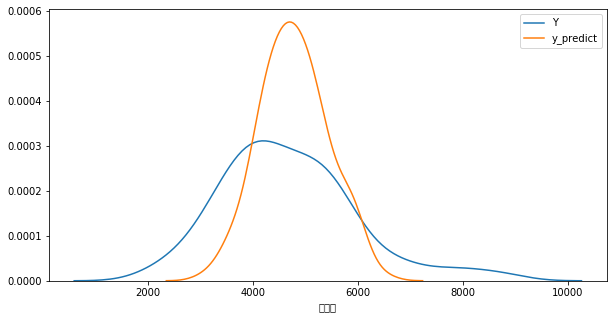

In [17]:
#실제 테스트 결과 값(Y)과 예측 결과값(y_predict)
#결과값이 떨어지는 것으로 보아 연비에 영향을 미치는 다른 변수가 있다.
plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y, hist = False, label = 'Y')
ax2 = sns.distplot(y_predict, hist = False , label = 'y_predict', ax=ax1)
plt.show()
plt.close()

In [191]:
y_test_predict = lr.predict(y_predict)  #test 데이터에 대한 모델의 예측값 구하기
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1, 1)

ax.plot(X_train, Y_train, 'o', label='Train Data')
ax.plot(X_test, y_test_predict, 'r*', label='Predicted Value')  #학습한 회귀선

ax.legend(loc='best')

plt.xlabel('weight-label')
plt.ylabel('mpg-label')

plt.show()
plt.close()

ValueError: Expected 2D array, got 1D array instead:
array=[4699.6214258  4699.55713865 4699.55973787 4699.58676966 4699.6313028
 4699.56199051 4699.57931859 4699.56441644 4699.56077755 4699.57897203
 4699.77668533 4699.63407529 4699.55904474 4699.56666909 4699.57013471
 4699.56441644 4699.58867575 4699.55055399 4699.57619953 4699.58451701
 4699.56545613 4699.60635038 4699.56978815 4699.56077755 4699.68034125
 4699.71603707 4699.58209108 4699.58486357 4699.61917315 4699.73683076
 4699.57308048 4699.62575782 4699.63060968 4699.64065996 4699.58919559
 4699.79591949 4699.65660179 4699.58971543 4699.58555669 4699.60739006
 4699.60912287 4699.63702107 4699.57931859 4699.60600382 4699.64793775
 4699.58313076 4699.63754091 4699.60357789 4699.60323133 4699.69801588
 4699.84859682 4699.61570754 4699.62887687 4699.65209649 4699.84409153
 4699.57671938 4699.68224733 4699.65417586 4699.69229762 4699.6160541
 4699.83629389 4699.70061509 4699.65192321 4699.63355545 4699.66838488
 4699.64395229 4699.70425399 4699.59664666 4699.66647879 4699.69801588
 4699.59855275 4699.688832   4699.62922343 4699.65001712 4699.71898285
 4699.9485798  4699.66301317 4699.62905015 4699.6978426  4699.96434834
 4699.65781475 4699.77581892 4699.68865872 4699.71135849 4699.63632794
 4699.85986007 4699.74878713 4699.71638364 4699.70546695 4699.71118521
 4699.80562321 4699.75363899 4699.61674722 4699.69021825 4699.76230303
 4699.60894959 4699.72851329 4699.67791532 4699.70494711 4699.73041937
 4700.02620956 4699.72972625 4699.6843267  4699.7418559  4700.08061971
 4699.71776988 4699.86003335 4699.7804975  4699.73839029 4699.64863087
 4699.89399637 4699.79297371 4699.75017338 4699.73908341 4699.77980438
 4699.85656774 4699.86505849 4699.68536639 4699.83404124 4699.89971464
 4699.62159908 4699.79210731 4699.69541667 4699.76178318 4699.7319789 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.